# Darren Hunt

11-15-2020

PHYS 434AA

Lab 5 - Higgs

In [1]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import scipy
import pickle

# Data Exploration

**Explanation of Variables and Terms**, from https://atlas.web.cern.ch/Atlas/GROUPS/PHYSICS/PAPERS/PERF-2017-04/ , https://arxiv.org/pdf/1906.11005.pdf, and other links below.

Higgs data refers to jets from a Higgs decay. QCD data refers to background jets.

*Kinematic data from the jet:*

'pt' : transverse momenta of particle collisions.

'eta' : $\eta$, angle measured from proton beam (along z-axis). $\eta$ is called pseudorapidity, which is a coordinate determined from the $\theta$ angle between  0 to $\pi$ in the pseudorapidity function, https://en.wikipedia.org/wiki/Pseudorapidity.

'phi' : $\phi$, the azimuthal angle, measured around the beam axis.

'mass' : particle jet mass.

'ee2' : 2nd energy correlation function, can be used in determining quark and gluon differences, https://arxiv.org/pdf/1305.0007.pdf, page 4.

'ee3' : 3rd energy corelation function, can be used in identifying W, Z, and Higgs bosons, https://arxiv.org/pdf/1305.0007.pdf, page 4.

'd2' : a ratio of the 3rd and 2nd energy correlation functions.

*Other data:* 

'angularity' : observable related to the symmetry of the jet's energy flow, https://arxiv.org/pdf/1206.5369.pdf. 

't1' : $\tau_N$, 1-subjettiness. Subjettiness refers to particle jet stream shapes, determined by transverse momentum and angular distance calculations, with *N* axes, https://arxiv.org/pdf/1201.0008.pdf.

't2' : 2-subjettiness.

't3' : 3-subjettiness.

't21' : $\tau_{21}$ The ratio of the 2-subjettiness to the 1-subjettiness, https://arxiv.org/pdf/1906.11005.pdf page 17.

't32' : The ratio of the 3-subjettiness to 2-subjettiness.

'KtDeltaR' : $k_t \Delta R$, the change in angular distance *R* of two subjets.

In [2]:
# import signal and background data. using first dataset provided (250-500)
higgs = open("higgs1.pkl",'rb')
qcd = open("qcd1.pkl", 'rb')
higgs_dict = pickle.load(higgs)
qcd_dict = pickle.load(qcd)

# list all keys of the files
print(higgs_dict.keys())  # signal
print(qcd_dict.keys())  # bkg

Index(['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1',
       't2', 't3', 't21', 't32', 'KtDeltaR'],
      dtype='object')
Index(['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1',
       't2', 't3', 't21', 't32', 'KtDeltaR'],
      dtype='object')


In [3]:
# plot histograms to examine data
def hist_plotter(param,bins,label):
    fig, ax = plt.subplots(1, 1, figsize=(10,10))
    plt.style.use('ggplot')
    ax.set_title("Histogram of "+label+" Parameter, Higgs Data", fontsize=24)
    ax.set_xlabel(label, fontsize=20)
    ax.set_ylabel("Frequency", fontsize=20)
    plt.tick_params(labelsize = 18)

    plt.hist(higgs_dict[param],bins=bins,color='r',alpha=0.7,label="Signal "+param)
    plt.hist(qcd_dict[param],bins=bins,color='b',alpha=0.7,label="Background "+param)
    
    ax.legend(loc='best',fontsize=16)
    plt.show()

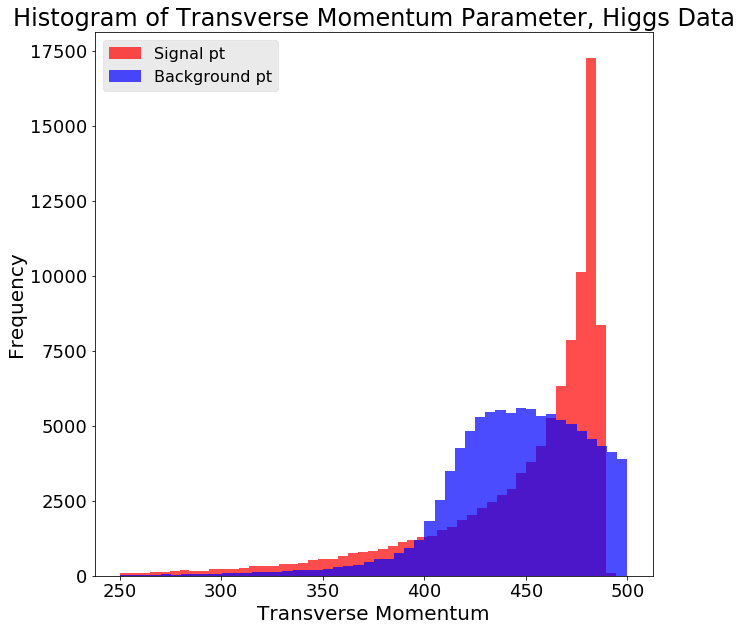

In [4]:
hist_plotter('pt',50,"Transverse Momentum")

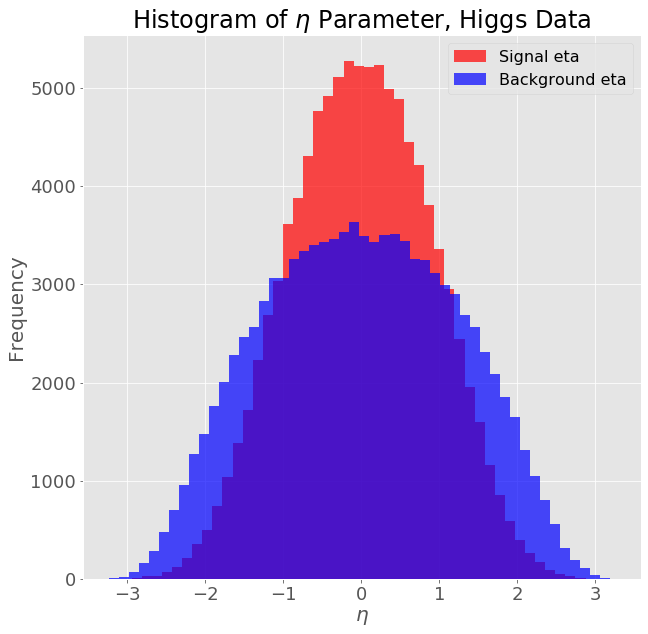

In [5]:
hist_plotter('eta',50,"$\eta$")

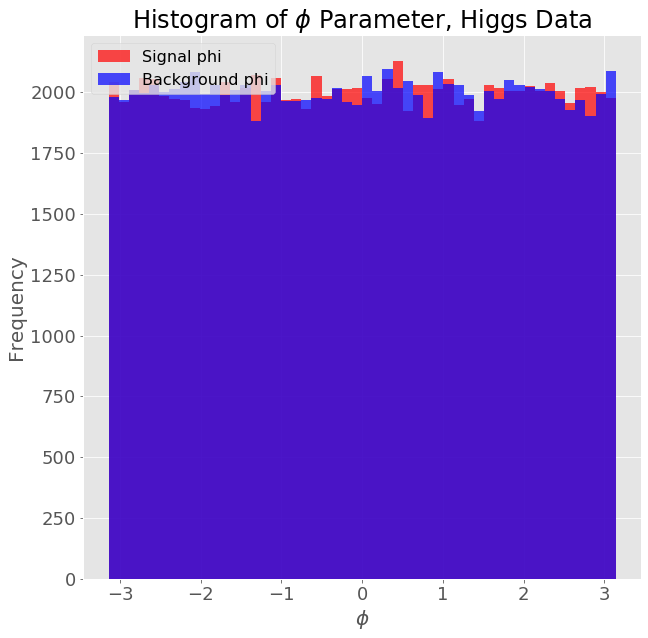

In [6]:
hist_plotter('phi',50,"$\phi$")

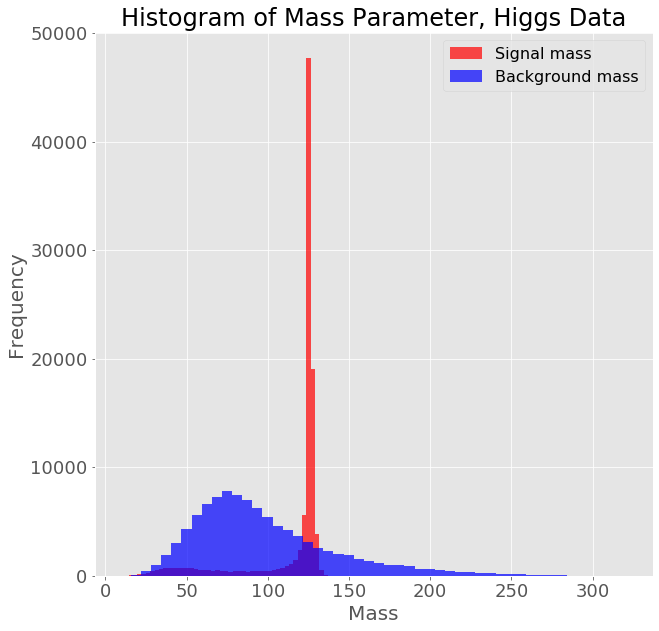

In [7]:
hist_plotter('mass',50,"Mass")

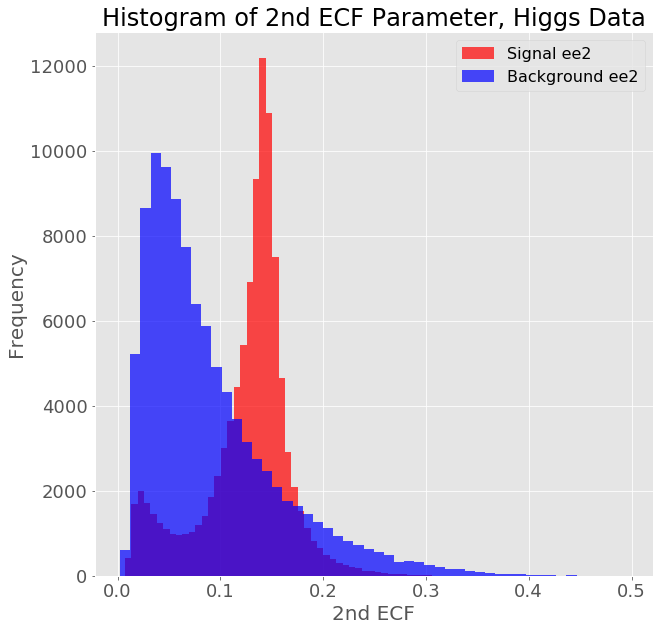

In [8]:
hist_plotter('ee2',50,"2nd ECF")

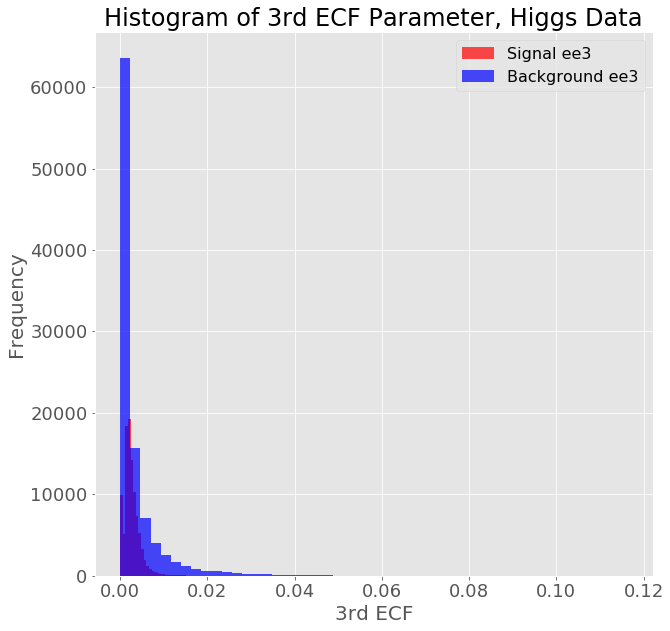

In [9]:
hist_plotter('ee3',50,"3rd ECF")

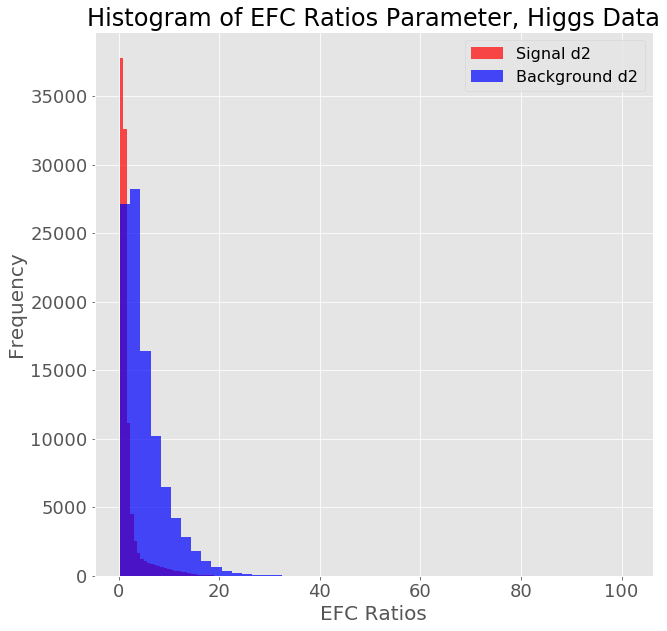

In [10]:
hist_plotter('d2',50,"EFC Ratios")

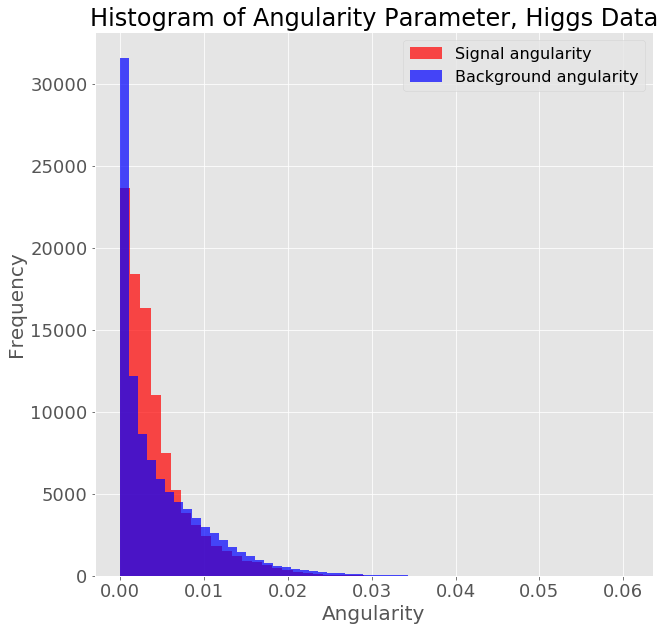

In [11]:
hist_plotter('angularity',50,"Angularity")

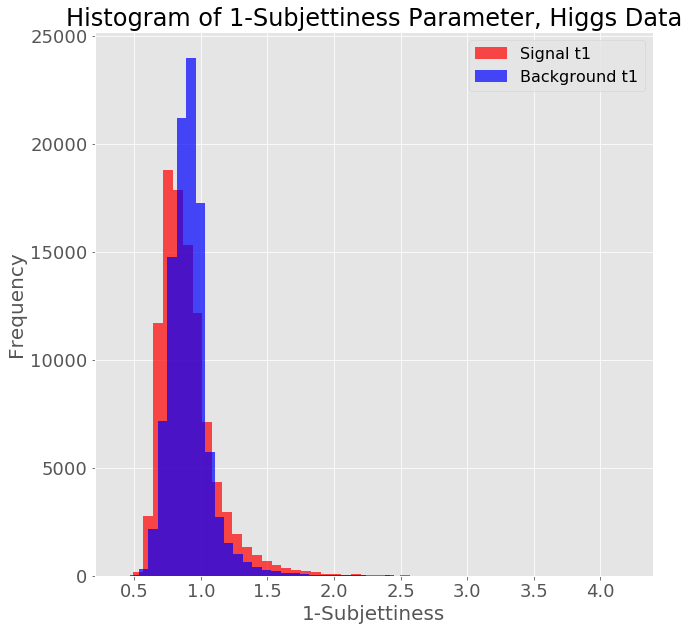

In [12]:
hist_plotter('t1',50,"1-Subjettiness")

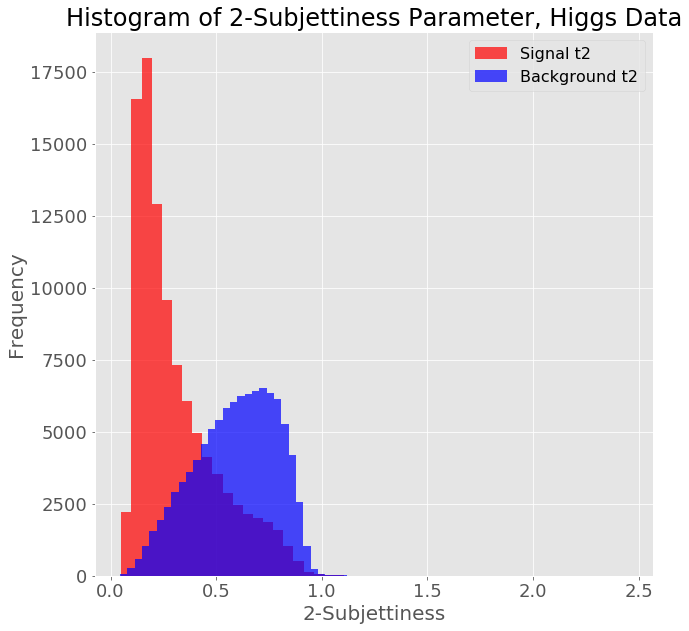

In [13]:
hist_plotter('t2',50,"2-Subjettiness")

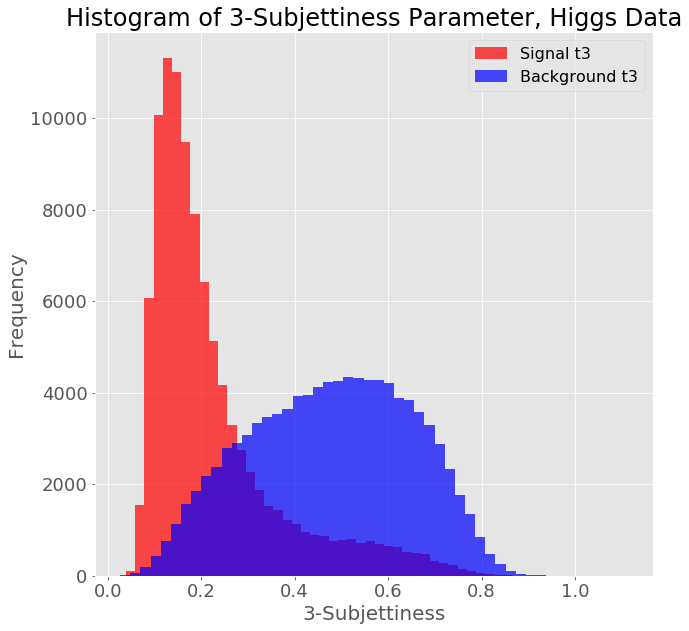

In [14]:
hist_plotter('t3',50,"3-Subjettiness")

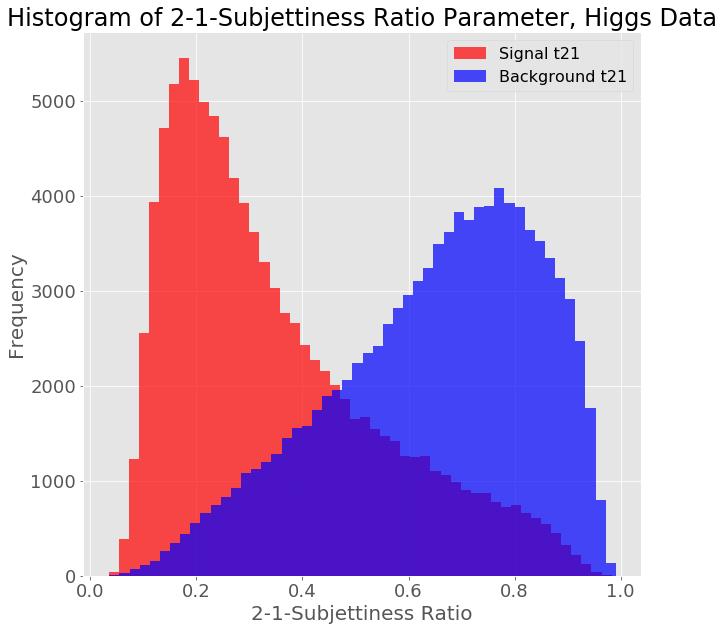

In [15]:
hist_plotter('t21',50,"2-1-Subjettiness Ratio")

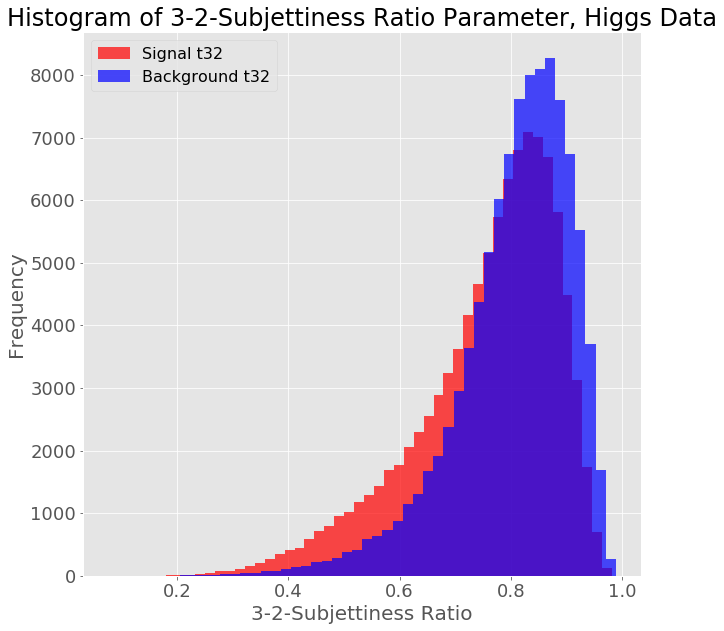

In [16]:
hist_plotter('t32',50,"3-2-Subjettiness Ratio")

Above are 14 different histogram plots showing a very preliminary comparison of the frequency of signal data values versus the background data. These histograms just give us an insight as to what sort of distributions we might be looking at, but from histograms alone we are not able to draw any major conclusions.

Lookgin at these histograms to begin, we can see some general overlapping and similarities between the signal and background for the $\phi$ parameter, suggesting that this is a relatively consistent measurement and not dependent on the background when it comes to the Higgs signal. The EFC ratios, angularity, 1-subjettiness, and 3-2 subjettiness ratios show some similar histogram distributions, but not quite the same. The remaining parameters show some considerable differences between background and signal data, for example, the 3-subjettiness plot.

In [17]:
def hist_2d(p1,p2,bins):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,7),gridspec_kw={'wspace': 0.4})
    ax1.set_title("Signal Data Relationship of "+p2 +" to "+p1, fontsize=24)
    ax2.set_title("Background Data Relationship of "+p2 +" to "+p1, fontsize=24),
    ax1.set_xlabel(p1, fontsize=20), ax2.set_xlabel(p1, fontsize=20)
    ax1.set_ylabel(p2, fontsize=20), ax2.set_ylabel(p2, fontsize=20)
    ax1.tick_params(labelsize = 18), ax2.tick_params(labelsize = 18)

    h1 = ax1.hist2d(higgs_dict[p1],higgs_dict[p2],density=True,bins=bins)
    h2 = ax2.hist2d(qcd_dict[p1],qcd_dict[p2],density=True,bins=bins) 
    
    fig.colorbar(h1[3],ax=ax1)
    fig.colorbar(h2[3],ax=ax2)
    plt.show

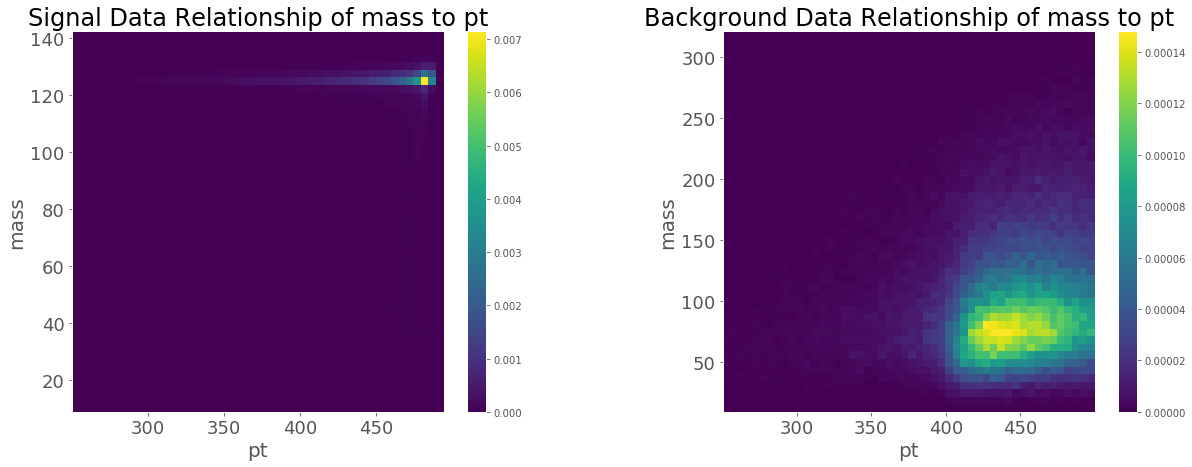

In [18]:
# additional plots for data exploration
# try mass versus pt.
hist_2d('pt','mass',50)

Here I have plotted two 2D histograms to show the relationships between mass and transverse momentum in the signal data and background separately. This shows us the density of points, if scatterplotted. The density can give us some insight on the spread of the dataset. Looking at the left plot, the Higgs singal has little spread. The point density is mostly concentrated within one area, around $p_t = 475$ and mass=125 (roughly). This means we likely won't expect major differences of mass as we increase transverse momentum. This however does not show outliers or statistically significant discoveries, only the general distribution.

The background on the other hand shows a wide spread of various mass values as we increase transverse momentum. We can expect the background to have a much wider, less defined relationship and more potential values. Therefore, this will likely be a factor to consider in future labs when examining the full background distribution.

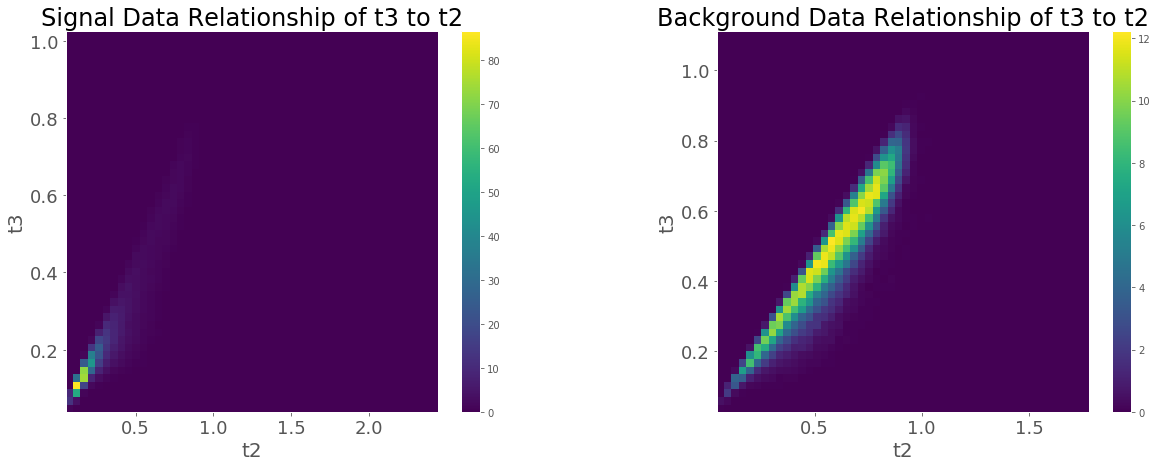

In [19]:
# try different subjettiness?
hist_2d('t2','t3',50)

Plotting the relationship between 2 and 3-subjettiness, we can see the spread differences between signal or background data. Again, the signal data has much less expected spread in potential values.

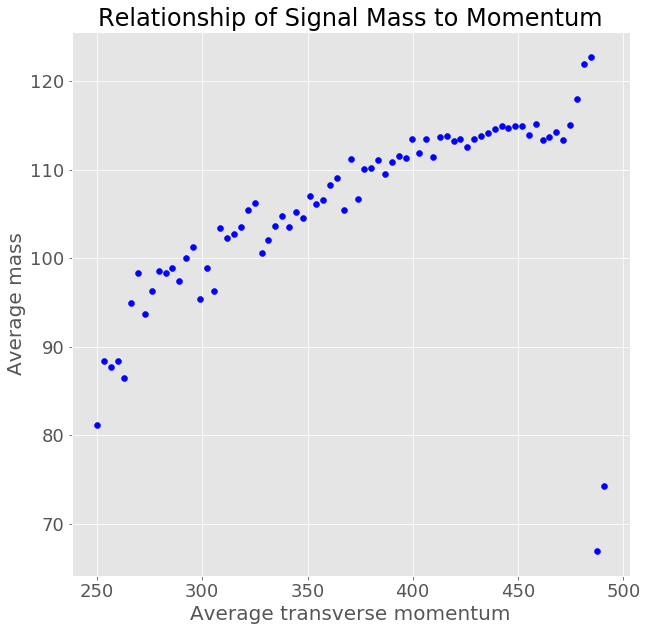

In [27]:
mu,edges,binNo = stats.binned_statistic(higgs_dict['pt'],higgs_dict['mass'],statistic='mean',bins=75)

fig, ax = plt.subplots(1, 1, figsize=(10,10))
plt.style.use('ggplot')
ax.set_title("Relationship of Signal Mass to Momentum", fontsize=24)
ax.set_xlabel("Average transverse momentum", fontsize=20)
ax.set_ylabel("Average mass", fontsize=20)
plt.tick_params(labelsize = 18)

plt.scatter(edges[:-1],mu,color='b')
plt.show()

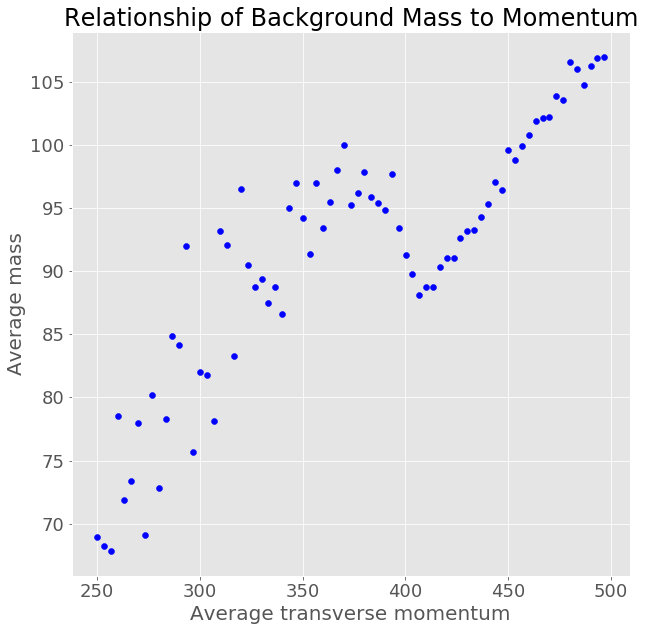

In [28]:
mu,edges,binNo = stats.binned_statistic(qcd_dict['pt'],qcd_dict['mass'],statistic='mean',bins=75)

fig, ax = plt.subplots(1, 1, figsize=(10,10))
plt.style.use('ggplot')
ax.set_title("Relationship of Background Mass to Momentum", fontsize=24)
ax.set_xlabel("Average transverse momentum", fontsize=20)
ax.set_ylabel("Average mass", fontsize=20)
plt.tick_params(labelsize = 18)

plt.scatter(edges[:-1],mu,color='b')
plt.show()

If we take the average value in each bin of the 2D histogram, we can plot a simpler scatterplot to look at the average mass as a function of transverse momentum to look closer at any potential relationships. This doesn't necessarily show us any discoveries or major outliers since it is only one average value from each bin of the 2D histogram, but we can see some general shapes forming above.

# Background Report

discuss what is LHC  here

discuss key terms here

discuss meaning of experiments here

discuss how data was taken here

etc